In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pandas.plotting import scatter_matrix
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/pi/Data_Science_Tutorial/data.csv')

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
data = data.drop(['Unnamed: 32','id'],axis=1)

In [5]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
data.head()
data.shape
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.shape

(569, 31)

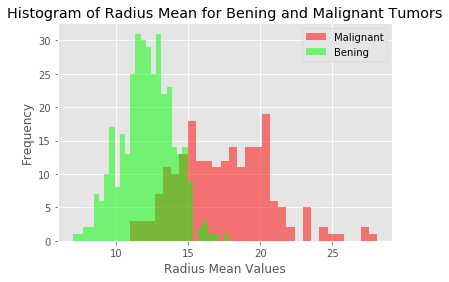

Most frequent malignant radius mean is:  20.101999999999997


In [8]:
import matplotlib.pyplot as plt
m = plt.hist(data[data['diagnosis']=='M'].radius_mean,bins=30,fc=(1,0,0,0.5),label='Malignant')
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

Calculating outliers:
            
            first we need to calculate first quartile (Q1)(25%)
    then find IQR(inter quartile range) = Q3-Q1
    finally compute Q1 - 1.5IQR and Q3 + 1.5IQR
    Anything outside this range is an outlier
        lets write the code for bening tumor distribution for feature radius mean


In [9]:
data_bening = data[data['diagnosis']=='B']
data_malignant = data[data['diagnosis']=='M']
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR  =Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

Anything outside this range is an outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


In [10]:
Q1

11.08

In [11]:
Q3

13.37

In [12]:
IQR

2.289999999999999

In [13]:
desc

count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64

In [14]:
data_bening

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
19,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
20,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
21,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
37,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
46,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,B,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,...,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004
559,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732
560,B,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321
561,B,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905


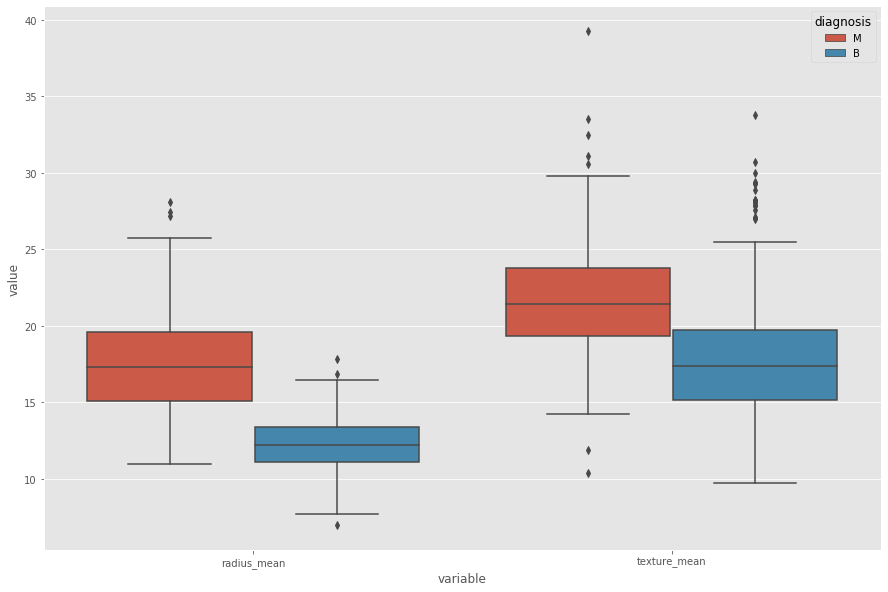

In [15]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

In [16]:
print("mean: ",data_bening.radius_mean.mean())
print("variance: ",data_bening.radius_mean.var())
print("standart deviation (std): ",data_bening.radius_mean.std())
print("describe method: ",data_bening.radius_mean.describe())

mean:  12.146523809523808
variance:  3.1702217220438738
standart deviation (std):  1.7805116461410393
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


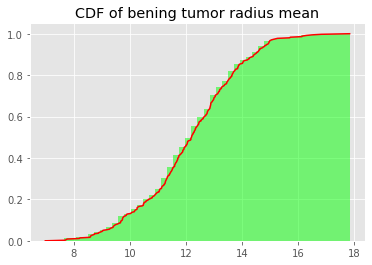

In [17]:
plt.hist(data_bening.radius_mean,bins=50,fc=(0,1,0,0.5),label='Bening',normed = True,cumulative = True)
sorted_data = np.sort(data_bening.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF of bening tumor radius mean')
plt.show()

In [18]:
mean_diff = data_malignant.radius_mean.mean() - data_bening.radius_mean.mean()
var_bening = data_bening.radius_mean.var()
var_malignant = data_malignant.radius_mean.var()
var_pooled = (len(data_bening)*var_bening +len(data_malignant)*var_malignant ) / float(len(data_bening)+ len(data_malignant))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.2048585165041414


TypeError: Cannot cast array data from dtype('int64') to dtype('int32') according to the rule 'safe'

<Figure size 1080x720 with 0 Axes>

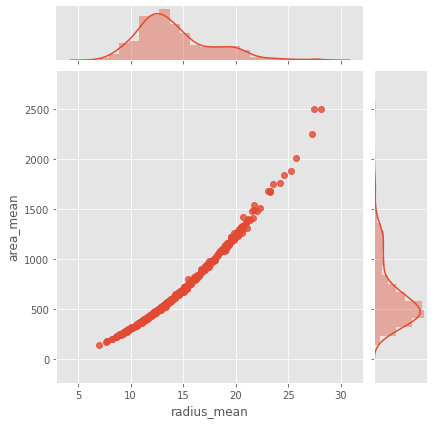

In [21]:
plt.figure(figsize = (15,10))
sns.jointplot(data.radius_mean,data.area_mean,kind='regg')
plt.show()

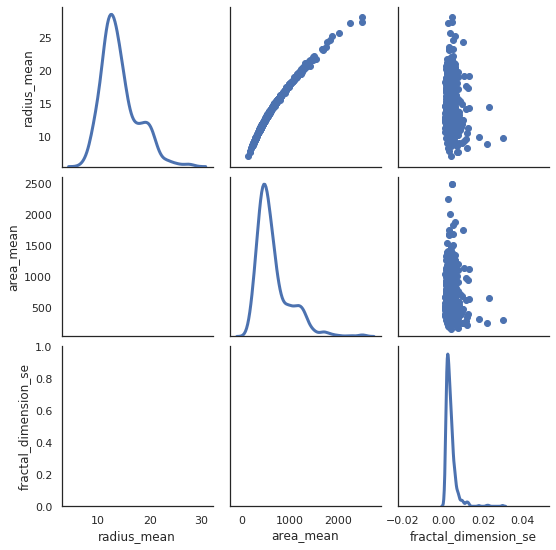

In [24]:
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean","fractal_dimension_se"]]
g = sns.PairGrid(df,diag_sharey = False,)
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw =3)
plt.show()

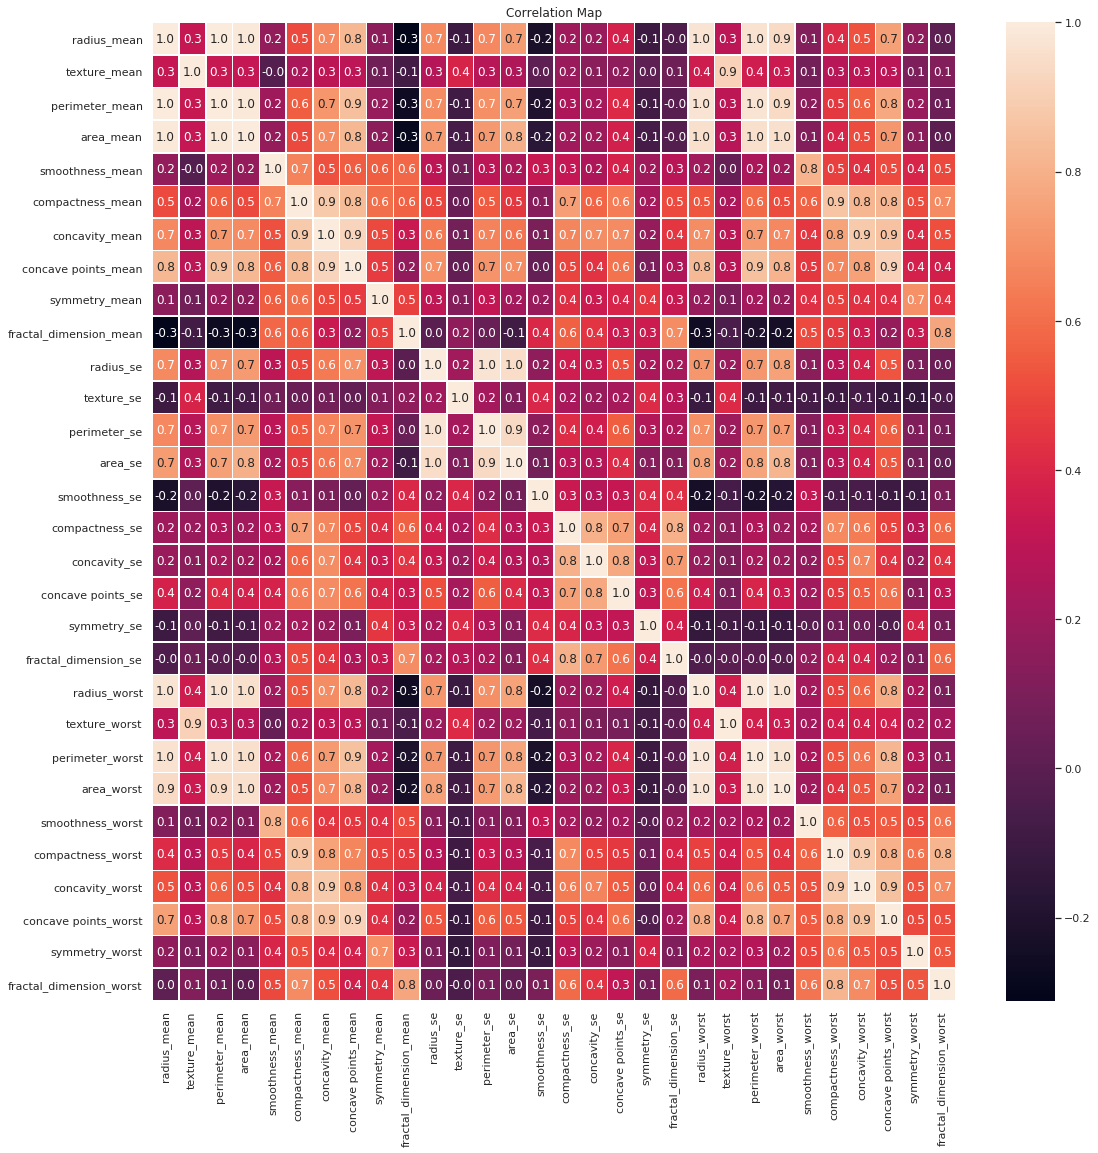

In [27]:
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [29]:
np.cov(data.radius_mean,data.area_mean)
print("Covariece bet radius mean and area mean: ",  data.radius_mean.cov(data.area_mean))
print("Covariance between radius mean and fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariece bet radius mean and area mean:  1224.483409346457
Covariance between radius mean and fractal dimension se:  -0.00039762485764406277


In [30]:
p1 = data.loc[:,['area_mean','radius_mean']].corr(method='pearson')
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())

In [31]:
print(p1)

             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000


In [32]:
print(p2)

0.9873571700566126


In [33]:
ranked_data = data.rank()
sp_corr = ranked_data.loc[:,['area_mean','radius_mean']].corr(method='pearson')
print(sp_corr)

             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [34]:
salary = [1,4,3,2,5,4,2,3,1,500]
print("Mean of salary: ",np.mean(salary))

Mean of salary:  52.5


In [35]:
print('medain: ', np.median(salary))

medain:  3.0


In [36]:
stat,p_value = stats.ttest_rel(data.radius_mean,data.area_mean)
print(p_value)

1.5253492492559045e-184


In [37]:
print(stat)

-43.86628729895275


mean:  109.9206741097456
stadard deviation:  19.95044770898572


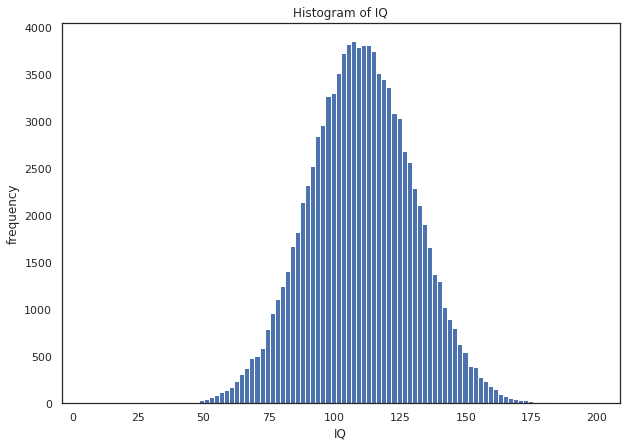

In [38]:
mu,sigma = 110,20
s = np.random.normal(mu,sigma,100000)
print('mean: ',np.mean(s))
print('stadard deviation: ', np.std(s))
plt.figure(figsize = (10,7))
plt.hist(s, 100, normed=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

In [41]:
s

array([146.29037853, 132.23140847, 122.86928939, ..., 127.72957313,
       119.35636436, 108.70168575])